In [1]:
%pip install opencv-python

  Using cached opencv_python-4.13.0.92-cp37-abi3-win_amd64.whl (40.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Read and display images

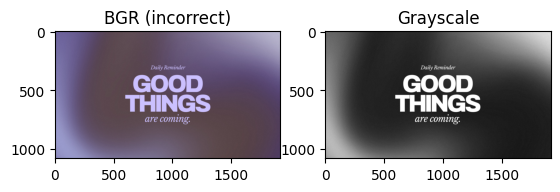

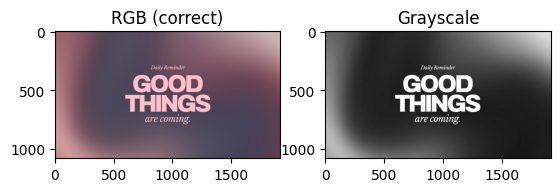

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Read image once (color)
im = cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png", 1)

# Convert to grayscale and RGB
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# --- Figure 1: Incorrect colors (BGR displayed as RGB) ---
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im)                     # BGR – wrong colors
plt.title('BGR (incorrect)')
plt.subplot(1,2,2)
plt.imshow(im_gray, cmap='gray')
plt.title('Grayscale')
plt.show()

# --- Figure 2: Correct colors (RGB conversion applied) ---
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im_rgb)                 # RGB – correct colors
plt.title('RGB (correct)')
plt.subplot(1,2,2)
plt.imshow(im_gray, cmap='gray')
plt.title('Grayscale')
plt.show()

In [9]:
# Print the image data types and shapes
print(im.dtype)

# Print the image size
print(im.shape)

uint8
(1080, 1920, 3)


In [10]:
# Save image to the specified path
cv2.imwrite(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\processed_image.png", im_rgb)

True

## Convert the image to gray scale

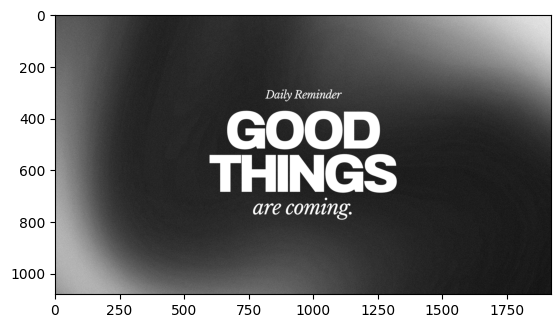

In [ ]:
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\processed_image.png", 1)


#Use cvtColor for color space conversion.cv2.COLOR_BGR2GRAY converts from BGR to grayscale color space.
# im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im_gray, cmap='gray')

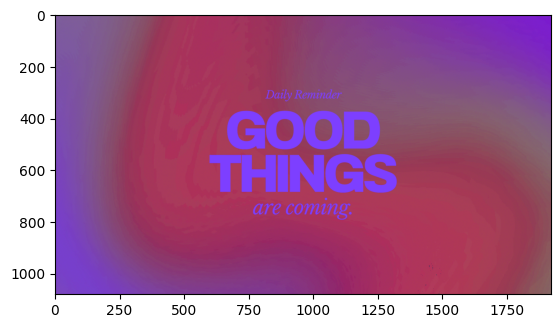

In [ ]:
im=cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\processed_image.png", 1)
im_hsv= cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(im_hsv)

#Here we convert the image to the HSV color space, which stands for Hue, Saturation, and Value. This color space is often used in image processing tasks because it separates the color information (hue) from the intensity information (value), making it easier to manipulate colors in an image. The resulting image will be displayed using Matplotlib, which may not render the HSV colors correctly since it expects RGB format.

## Image geometric transformations

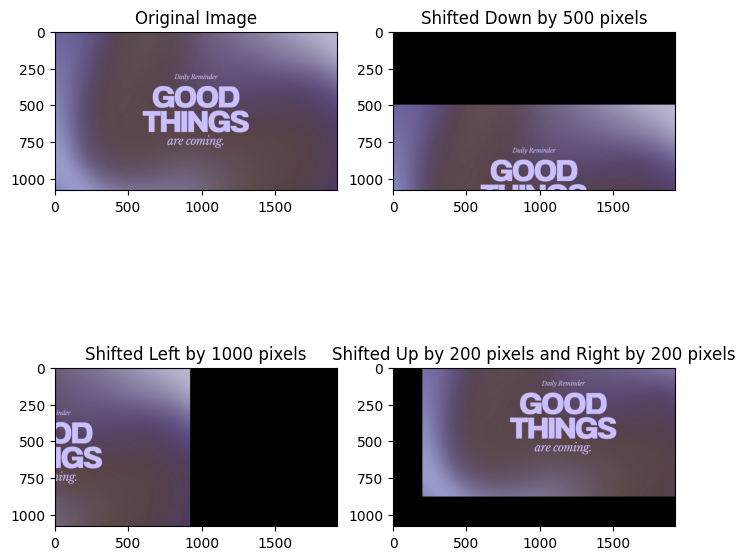

In [14]:
import numpy as np
import cv2

def translate(img, x, y):
    # Obtain the image size
    (h, w) = img.shape[:2]
    
    # Define the translation matrix
    M = np.float32([[1, 0, x], [0, 1, y]])
    
    # Use the openCV affine transformation function to perform the translation
    shifted = cv2.warpAffine(img, M, (w, h))
    return shifted

# Load the image and display it
image = cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\processed_image.png")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(img_rgb)
# Translate the image and display the result

shifted_1= translate(img_rgb, 0, 500)
plt.subplot(2,2,2), plt.title('Shifted Down by 500 pixels'), plt.imshow(shifted_1)
# Moe left by 1000 pixels
shifted_2= translate(img_rgb, -1000, 0)
plt.subplot(2,2,3), plt.title('Shifted Left by 1000 pixels'), plt.imshow(shifted_2)
# Move up by 200 pixels and right by 200 pixels
shifted_3= translate(img_rgb, 200, -200)
plt.subplot(2,2,4), plt.title('Shifted Up by 200 pixels and Right by 200 pixels'), plt.imshow(shifted_3)
plt.show()

(<Axes: title={'center': 'Rotated by 90 degrees counter-clockwise'}>,
 Text(0.5, 1.0, 'Rotated by 90 degrees counter-clockwise'),
 <matplotlib.image.AxesImage at 0x1b6bb55e1a0>)

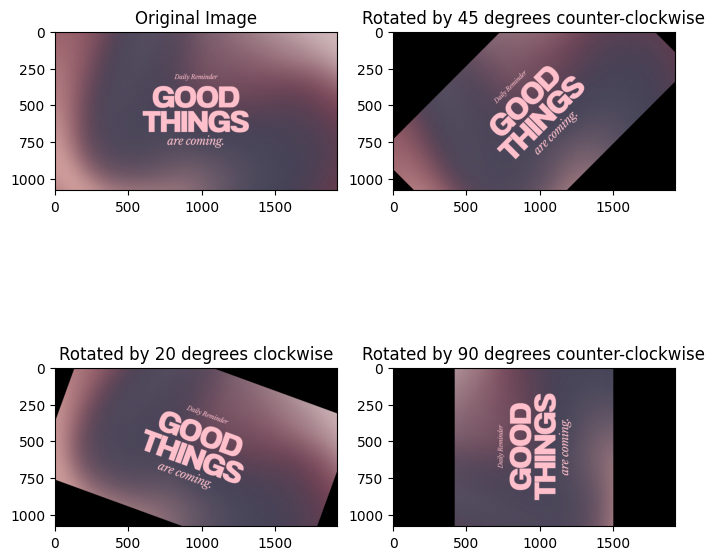

In [16]:
# Rotation function
def rotate(img, angle, center=None, scale=1.0):
    # Obtain the image size
    (h, w) = img.shape[:2]
    
    # If the center is None, initialize it as the center of the image
    if center is None:
        center = (w // 2, h // 2)
    
    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(img, M, (w, h))
    return rotated
# Load the image and display it
image = cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(img_rgb)
# Rotate the image by 45 degrees and display the result
rotated_1= rotate(img_rgb, 45)
plt.subplot(2,2,2), plt.title('Rotated by 45 degrees counter-clockwise'), plt.imshow(rotated_1)
# Clockwise by 20 degrees
rotated_2= rotate(img_rgb, -20)
plt.subplot(2,2,3), plt.title('Rotated by 20 degrees clockwise'), plt.imshow(rotated_2)
# Counter-clockwise by 90 degrees
rotated_3= rotate(img_rgb, 90)
plt.subplot(2,2,4), plt.title('Rotated by 90 degrees counter-clockwise'), plt.imshow(rotated_3)
# Rotate around a specific point (100, 100) by 30 degrees
# rotated_4= rotate(img_rgb, 30, center=(100, 100))
# plt.subplot(2,2,5), plt.title('Rotated by 30 degrees around (100,100)'), plt.imshow(rotated_4)
# plt.show()

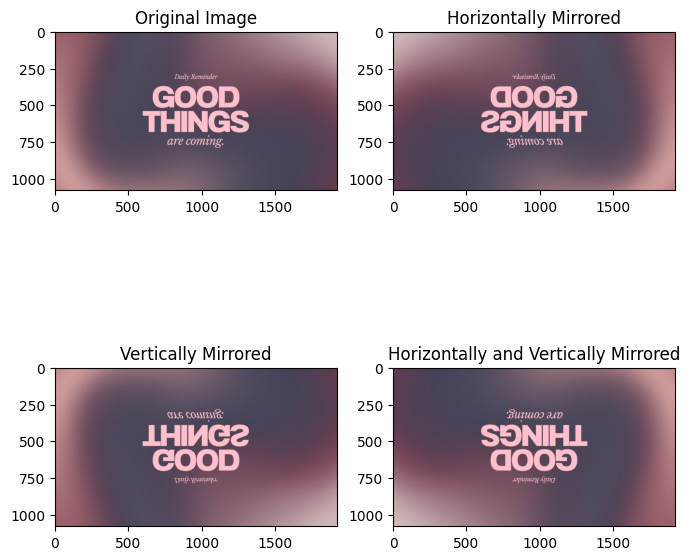

In [17]:
# Mirroring
im = cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(im_rgb)
# Horizontal mirroring
im_horiz = cv2.flip(im_rgb, 1)
plt.subplot(2,2,2), plt.title('Horizontally Mirrored'), plt.imshow(im_horiz)
# Vertical mirroring
im_vert = cv2.flip(im_rgb, 0)
plt.subplot(2,2,3), plt.title('Vertically Mirrored'), plt.imshow(im_vert)
# Both horizontal and vertical mirroring
im_both = cv2.flip(im_rgb, -1)
plt.subplot(2,2,4), plt.title('Horizontally and Vertically Mirrored'), plt.imshow(im_both)
plt.show()

(<Axes: title={'center': 'Scaled Image (Bilinear)'}>,
 Text(0.5, 1.0, 'Scaled Image (Bilinear)'),
 <matplotlib.image.AxesImage at 0x1b6c23ff670>)

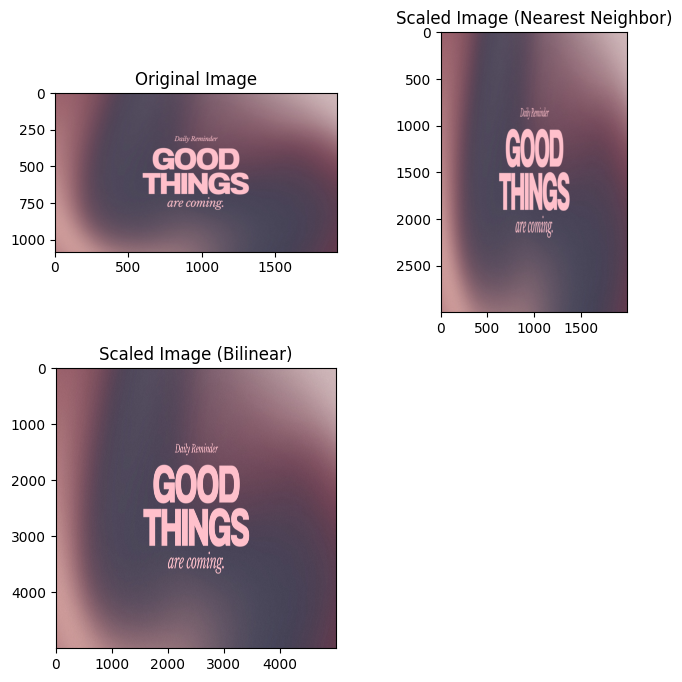

In [18]:
# Scaling
im= cv2.imread("Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(im_rgb)

#Obtain the image size
(h, w) = im.shape[:2]

#Define the target size for scaling
dst_size=(2000, 3000)

#Nearest neighbor interpolation
method = cv2.INTER_NEAREST

#Perform scaling
resized=cv2.resize(im_rgb, dst_size, interpolation=method)
plt.subplot(2,2,2), plt.title('Scaled Image (Nearest Neighbor)'), plt.imshow(resized)

#Define the target size for scaling
dst_size=(5000, 5000)

#Bilinear interpolation
method = cv2.INTER_LINEAR

#Perform scaling
resized=cv2.resize(im_rgb, dst_size, interpolation=method)
plt.subplot(2,2,3), plt.title('Scaled Image (Bilinear)'), plt.imshow(resized)

## Image grayscale transformations

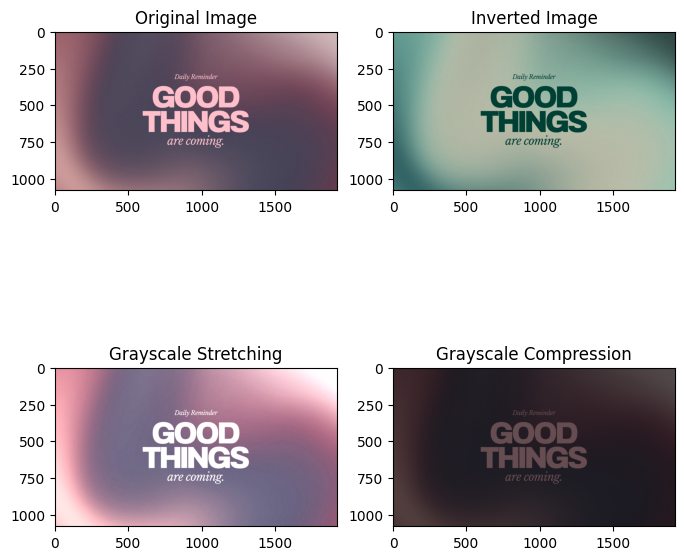

In [20]:
def linear_trans(img, k, b=0):
    #Calculate the mapping table forthe linear grayscale transformation
    trans_list=[(np.float32(x)*k+b) for x in range(256)]
    #Convert the list to np.array
    trans_table=np.array(trans_list)
    #Adjust values exceeding the [0, 255] grayscale range and specify the data type as uint8
    trans_table[trans_table>255]=255
    trans_table[trans_table<0]=0
    trans_table=np.round(trans_table).astype(np.uint8)
    #Apply the mapping table to the input image using OpenCV's LUT function
    transformed = cv2.LUT(img, trans_table)
    return transformed

im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(im_rgb)

#Inversion transformation (k=-1, b=255)
inverted= linear_trans(im_rgb, k=-1, b=255)
plt.subplot(2,2,2), plt.title('Inverted Image'), plt.imshow(inverted)

#Grayscaling stretching (k=1.5, b=0)
stretched= linear_trans(im_rgb, 1.5, 0)
plt.subplot(2,2,3), plt.title('Grayscale Stretching'), plt.imshow(stretched)

#Grayscaling compression (k=0.4, b=0)
compressed= linear_trans(im_rgb, 0.4, 0)
plt.subplot(2,2,4), plt.title('Grayscale Compression'), plt.imshow(compressed)
plt.show()

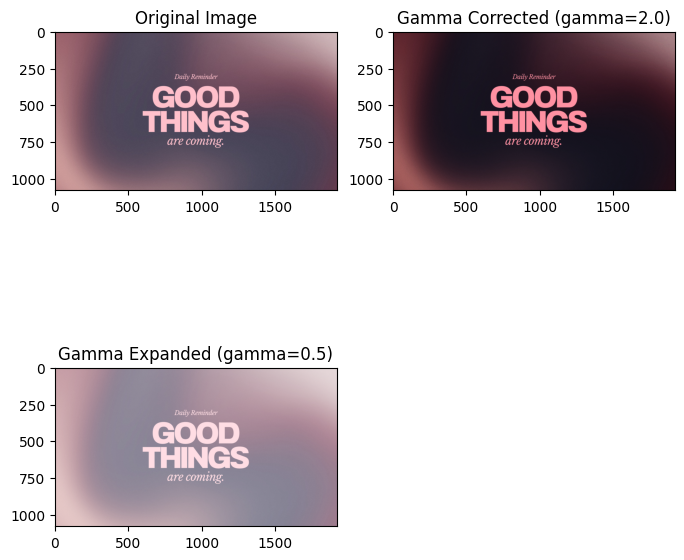

In [21]:
#Gamma transformation
def gamma_trans(img, gamma):
    #Normalize to 1, perform the gamma calculation, and then scale back to [0, 255]
    gamma_list=[np.power(x/255.0, gamma)*255 for x in range(256)]
    #Convert the list to np.array
    gamma_table=np.round(np.array(gamma_list)).astype(np.uint8)
    
    #Apply the mapping table to the input image using OpenCV's LUT function
    transformed = cv2.LUT(img, gamma_table)
    return transformed

im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(im_rgb) 
#Gamma correction (gamma=2.0). This will darken the image by reducing the intensity of lighter pixels more than darker ones.
gamma_corrected= gamma_trans(im_rgb, 2.0)
plt.subplot(2,2,2), plt.title('Gamma Corrected (gamma=2.0)'), plt.imshow(gamma_corrected)
#Gamma expansion (gamma=0.5). This will brighten the image by enhancing the intensity of darker pixels more than lighter ones.
gamma_expanded= gamma_trans(im_rgb, 0.5)
plt.subplot(2,2,3), plt.title('Gamma Expanded (gamma=0.5)'), plt.imshow(gamma_expanded)
plt.show()

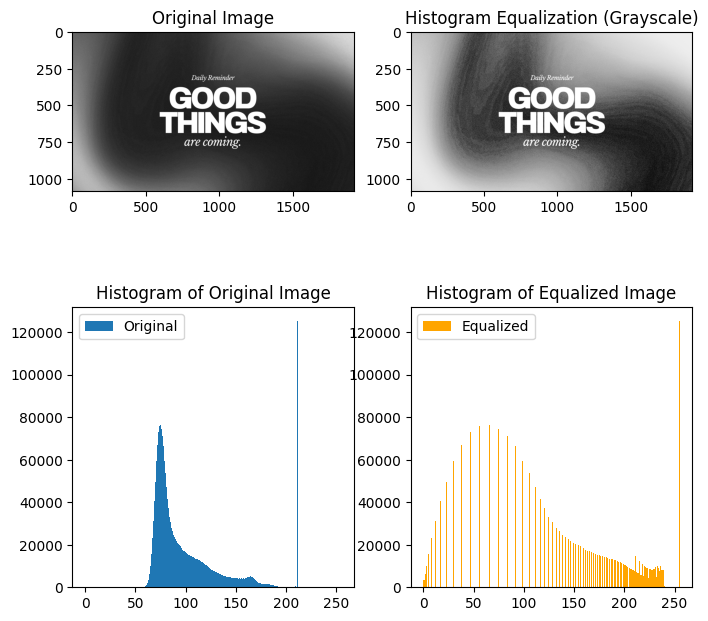

In [23]:
# Histogram equalization
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png", 0)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1), plt.title('Original Image'), plt.imshow(im, cmap='gray')
# Convert to grayscale for histogram equalization
im_equa1=cv2.equalizeHist(im)
plt.subplot(2,2,2), plt.title('Histogram Equalization (Grayscale)'), plt.imshow(im_equa1, cmap='gray')

#Display the histogram of the original and equalized images
plt.subplot(2,2,3)
plt.title('Histogram of Original Image')
plt.hist(im.ravel(), bins=256, range=(0, 255), label='Original')
plt.legend()

plt.subplot(2,2,4)
plt.title('Histogram of Equalized Image')
plt.hist(im_equa1.ravel(), bins=256, range=(0, 255), label='Equalized', color='orange')
plt.legend()
plt.show()

Simple Thresholding (threshold=127): 127.0
Otsu's Thresholding (optimal threshold): 130.0


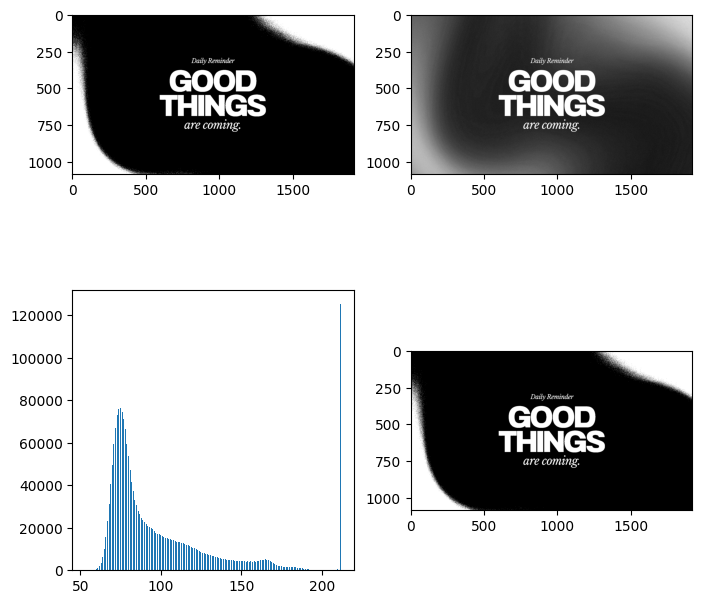

In [25]:
#image binarization
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png", 0)
ret1, th1= cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
#Otsu filtering automatically determines the optimal threshold value by maximizing the between-class variance. It is particularly effective when the image has a bimodal histogram, where the pixel intensity values are clustered around two distinct peaks (e.g., foreground and background). Otsu's method analyzes the histogram of the image to find the threshold that best separates these two classes, making it a powerful tool for image binarization without requiring manual threshold selection.
ret2, th2= cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
print("Simple Thresholding (threshold=127):", ret1)
print("Otsu's Thresholding (optimal threshold):", ret2)
plt.figure(figsize=(8,8))

plt.subplot(2,2,2), plt.imshow(im, cmap='gray')
plt.subplot(2,2,3), plt.hist(im.ravel(), 256)
plt.subplot(2,2,1), plt.imshow(th1, cmap='gray')
plt.subplot(2,2,4), plt.imshow(th2, cmap='gray')
plt.show()

## Image morphological processing

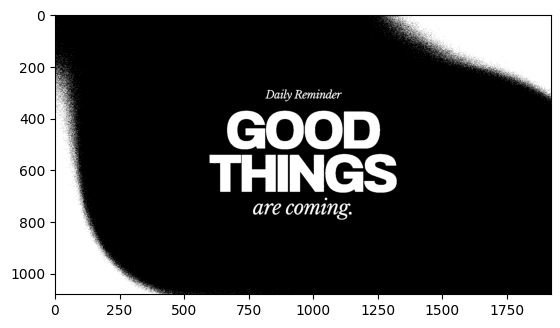

In [29]:
img= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png", 0)
_, bin_img= cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray')

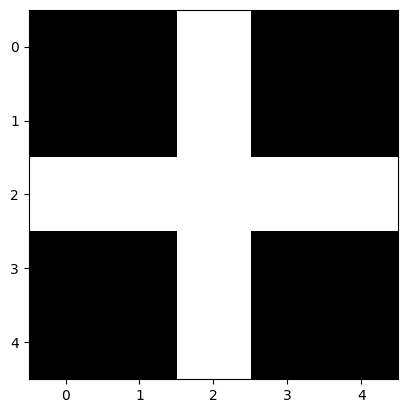

In [28]:
#Define the structuring element (kernel) for morphological operations

element= cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
plt.imshow(element, cmap='gray')

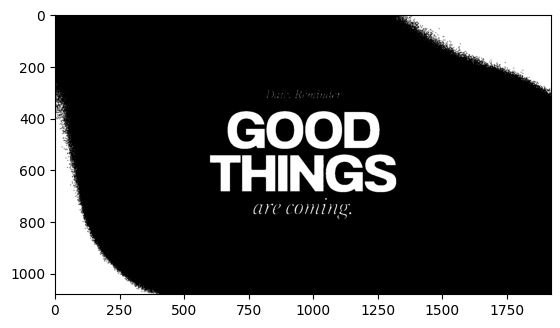

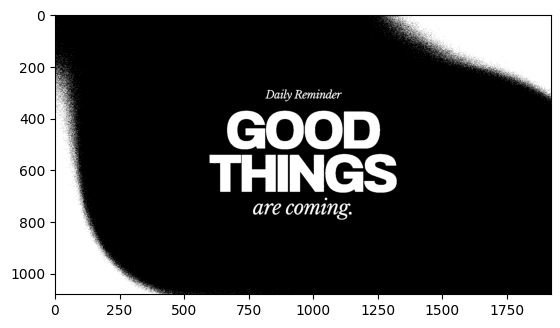

In [30]:
#Erosion
eroded = cv2.erode(bin_img, element, iterations=1)
plt.imshow(eroded, cmap='gray')
plt.figure()
plt.imshow(bin_img, cmap='gray')

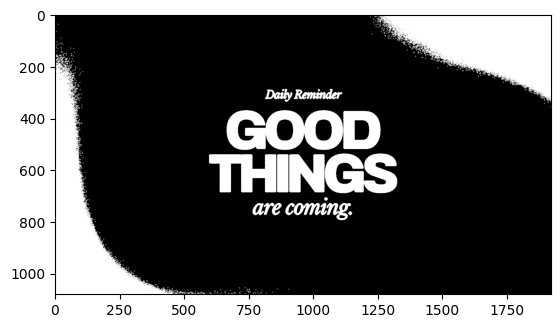

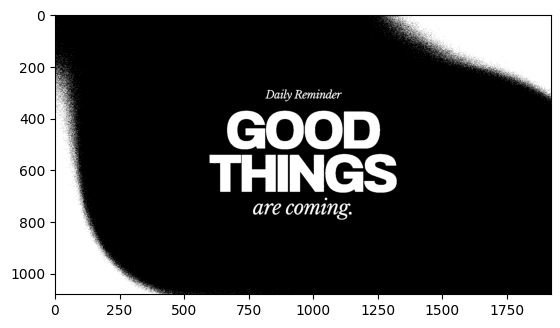

In [31]:
#Dilation
dilated = cv2.dilate(bin_img, element, iterations=1)
plt.imshow(dilated, cmap='gray')
plt.figure()
plt.imshow(bin_img, cmap='gray')

## Image filtering

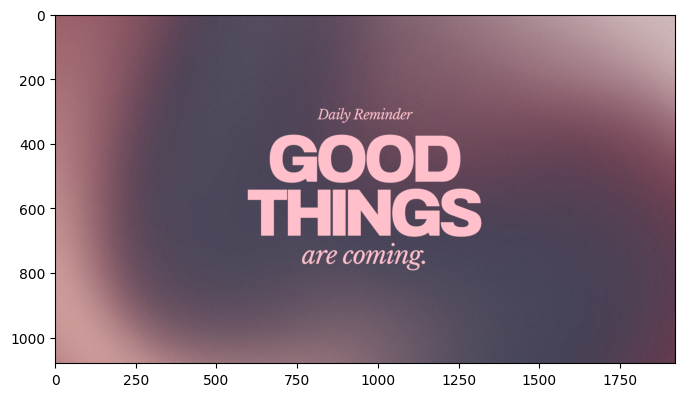

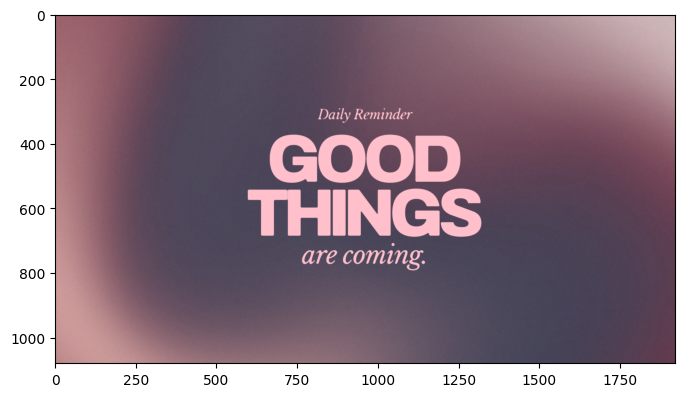

In [33]:
#Median filtering
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(im_rgb)

im_median = cv2.medianBlur(im_rgb, 5)
plt.figure(figsize=(8,8))
plt.imshow(im_median)
plt.show()

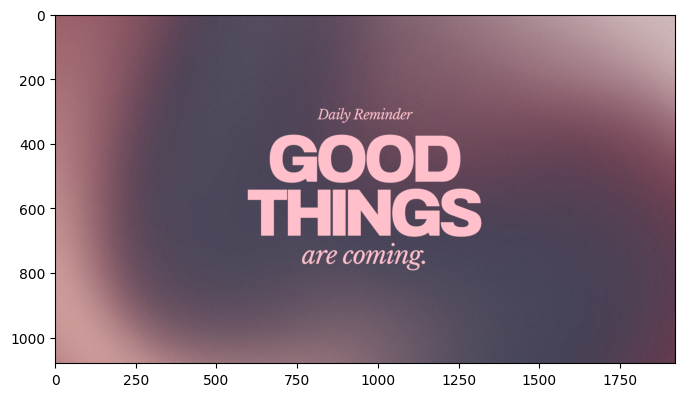

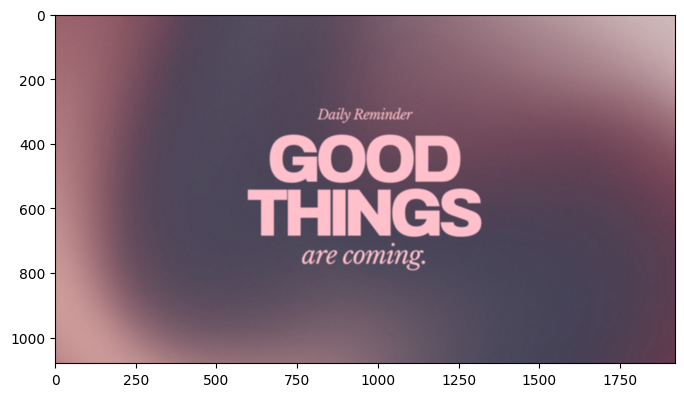

In [34]:
#mean filtering
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(im_rgb)

im_mean = cv2.blur(im_rgb, (5,5))
plt.figure(figsize=(8,8))
plt.imshow(im_mean)
plt.show()

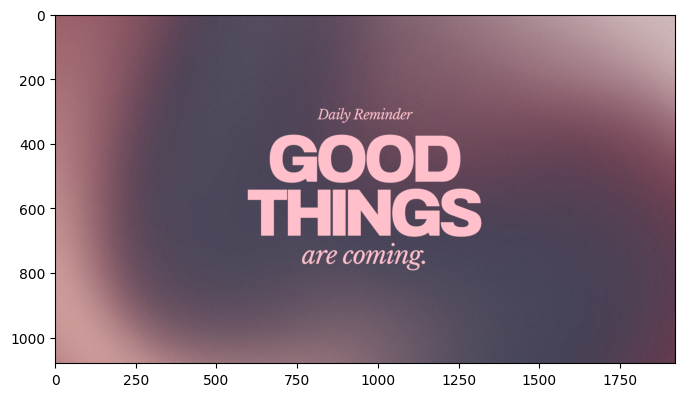

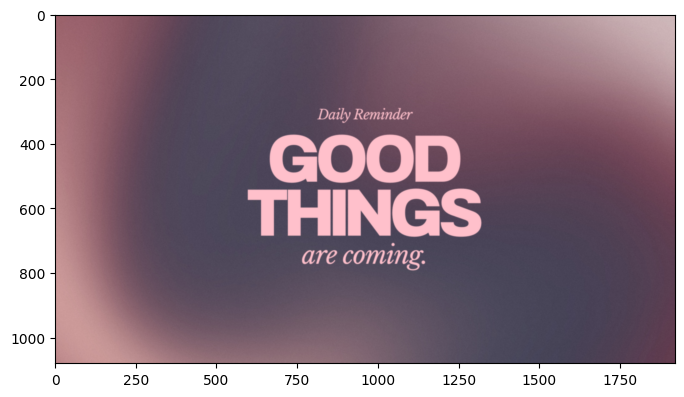

In [35]:
#Guassian filtering
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(im_rgb)

im_gaussian = cv2.GaussianBlur(im_rgb, (5,5), 0)
plt.figure(figsize=(8,8))
plt.imshow(im_gaussian)
plt.show()

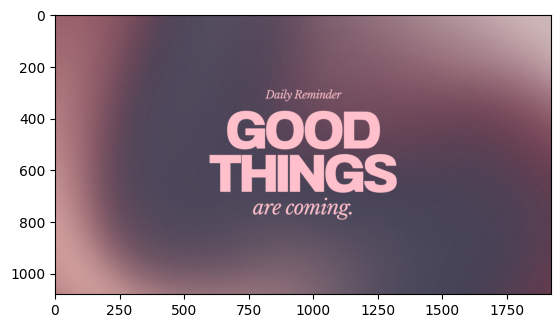

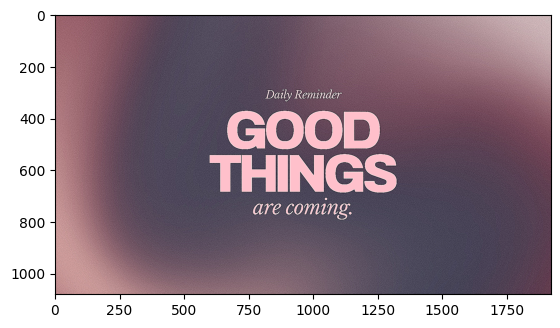

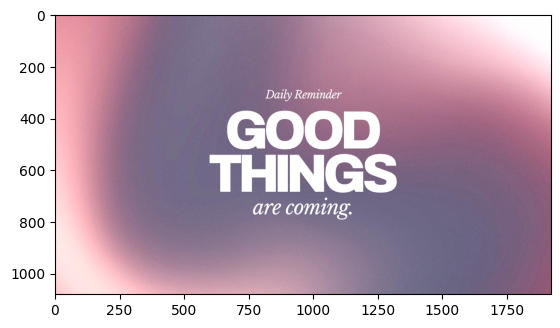

In [36]:
#image sharpening
im= cv2.imread(r"C:\Users\user\Huawei Competition\HCIP-AI-EI-2.5\Untitled design.png")
im_rgb=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

#sharpening operator   
sharpen1=np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]) 

#Use filter2D to apply the sharpening operator to the image
sharpened1 = cv2.filter2D(im_rgb, -1, sharpen1)
plt.figure()
plt.imshow(sharpened1)
sharpen2=np.array([[0, -1, 0], [-1, 8, -1], [0, 1, 0]])/4
sharpened2 = cv2.filter2D(im_rgb, -1, sharpen2)
plt.figure()
plt.imshow(sharpened2)